In [2]:
# %% Bibliothèques
import matplotlib.pyplot as plt
import numpy as np
import graphe as g
import signaux as s
from fourier_transform import fft, ifft
from numpy.random import rand

# %% Constantes
COLOR1 = 'red'
COLOR2 = 'blue'


4.006320209941965 1.5024284604356903


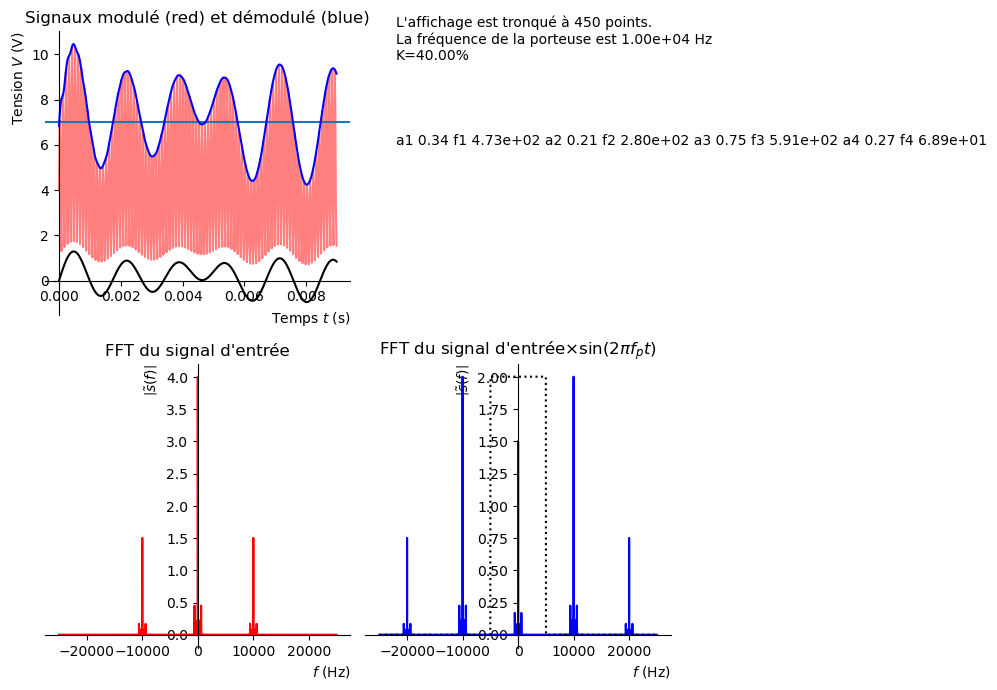

In [3]:
a1, a2, a3, a4 = rand(), rand(), rand(), rand()
f1, f2, f3, f4 = 700*rand(), 700*rand(), 700*rand(), 700*rand()
fp = 10000
K=.40
time = np.array([0+k/(5*fp) for k in range(8000)])
model = s.GenerateSinus(a1, f1)(time) + s.GenerateSinus(a2, f2)(time) + s.GenerateSinus(a3, f3)(time) + s.GenerateSinus(a4, f4)(time)
data = (K*model+1)*(s.GenerateSinus(3, fp)(time)+4)


slice = 150*3
style = {
    (0, 0): lambda ax: g.lin_XY(ax, title=f'Signaux modulé ({COLOR1}) et démodulé ({COLOR2})', x_label=r'Temps $t$', x_unit='s', y_label=r'Tension $V$', y_unit='V'),
    (1, 0): lambda ax: g.lin_XY(ax, title="FFT du signal d'entrée", x_label=r'$f$', x_unit='Hz', y_label=r"$\left| \tilde{s}(f) \right|$", y_unit=r""),
    (0, 1): lambda ax: g.empty(ax),
    (1, 1): lambda ax: g.lin_XY(ax, title=r"FFT du signal d'entrée$\times\sin(2\pi f_p t)$", x_label=r'$f$', x_unit='Hz', y_label=r"$\left| \tilde{s}(f) \right|$", y_unit=r"")
}
axs = g.new_mosaique(2, 2, style, figsize=(10, 7))

# Affichag des données
axs[(0, 0)].plot(time[:slice], data[:slice], color=COLOR1, alpha=.5)
axs[(0, 0)].plot(time[:slice], model[:slice], color='black')

# Calcul de la fft
Te = time[1] - time[0]
complex_fft, freq_fft = fft(data, Te)
ampl_fft = np.abs(complex_fft)
axs[(1, 0)].plot(freq_fft, ampl_fft, COLOR1)
offset_porteuse = ampl_fft[freq_fft==0][0]

# Fréquence de la porteuse
index_porteuse = np.argmax(np.abs(complex_fft[:len(complex_fft)//2]))
f_porteuse = np.abs(freq_fft[index_porteuse])

# Du texte
axs[(0, 1)].text(.1, .9, f"L'affichage est tronqué à {slice} points.\nLa fréquence de la porteuse est {f_porteuse:.2e} Hz\nK={K*100:.2f}%")
axs[(0, 1)].text(.1, .6, f"a1 {a1:.2f} f1 {f1:.2e} a2 {a2:.2f} f2 {f2:.2e} a3 {a3:.2f} f3 {f3:.2e} a4 {a4:.2f} f4 {f4:.2e}")

# Démodulation
new_data = data*s.GenerateSinus(1, f_porteuse)(time)
complex_new_fft, freq_new_fft = fft(new_data, Te)
ampl_new_fft = np.abs(complex_new_fft)
offset_new_fft = ampl_new_fft[freq_new_fft==0][0]
axs[(1, 1)].plot(freq_new_fft, np.abs(complex_new_fft), COLOR2)

mask = (-f_porteuse/2 <= freq_new_fft) & (freq_new_fft <= f_porteuse/2)
axs[(1, 1)].plot(freq_new_fft, mask*np.max(ampl_new_fft), 'k:')
complex_signal_demodule = ifft(mask*complex_new_fft)
k = np.max(data)/np.max(np.abs(complex_signal_demodule))
M = np.max(data)
signal_demodule = np.abs(complex_signal_demodule)*k
axs[(0, 0)].axhline(4+1.5*2)
axs[(0, 0)].plot(time[:slice], signal_demodule[:slice], color=COLOR2)
print(offset_porteuse, offset_new_fft)

In [4]:
with open('bloc_3_data/B3_data_02_fr.txt','r') as f:
    txt = f.read()

In [5]:
import base64

# Spécifiez le chemin du fichier encodé en Base64
chemin_fichier_base64 = "bloc_3_data/B3_data_02.txt"

# Ouvrez le fichier encodé en mode lecture binaire
with open(chemin_fichier_base64, "rb") as fichier_enc:
    # Lisez le contenu du fichier encodé
    contenu_enc = fichier_enc.read()

    # Décodez le contenu Base64
    contenu_decode = base64.b64decode(contenu_enc)


In [6]:
np.frombuffer(contenu_decode, dtype=np.float64)

array([2.78136354e-309, 2.78136354e-309, 4.17203470e-309, ...,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000])

In [7]:
import base64

# Chaîne Base64 à décoder
chaine_base64 = "AAD+/wAAAgAAAP3/AAACAAAA/f8AAAMAAAD9/wAABAAAAPv/AAAEAAAA+/8AAAYAAAD7/wAABgAAAPr/AAAHAAAA+f8AAAcAAAD5/wAABwAAAPj/AAAJAAAA+P8AAAkAAAD3/wAACgAAAPb/AAAKAAAA9v8AAAoAAAD1/wAADAAAAPT/AAANAAAA8/8AAA0AAADz/wAADQAAAPL/AAAOAAAA8v8AAA8AAADw/wAADwAAAPH/AAAQAAAA8f8AABEAAADv/wAAEQAAAPD/AAARAAAA7v8AABAAAADu/wAAEgAAAO7/AAASAAAA7v8AABEAAADu/wAAEgAAAO7/AAATAAAA7f8AABIAAADu/wAAEgAAAO7/AAATAAAA7f8AABEAAADu/wAAEgAAAO7/AAASAAAA7v8AABIAAADv/wAAEQAAAO//AAASAAAA7v8AABEAAADv/wAAEAAAAO//AAARAAAA7/8AABIAAADu/wAAEQAAAO//AAASAAAA7/8AABIAAADw/wAAEQAAAPD/AAAQAAAA7/8AABIAAADu/wAAEQAAAO//AAASAAAA8P8AABIAAADu/wAAEAAAAO7/AAASAAAA7v8AABIAAADt/wAAEAAAAO//AAATAAAA7v8AABIAAADt/wAAEwAAAOz/AAATAAAA7f8AABMAAADs/wAAFAAAAOz/AAATAAAA7f8AABMAAADs/wAAEgAAAOz/AAATAAAA7f8AABMAAADr/wAAFQAAAOz/AAAVAAAA7f8AABQAAADq/wAAFQAAAOv/AAAVAAAA7P8AABUAAADr/wAAFwAAAOv/AAAVAAAA6/8AABYAAADs/wAAFQAAAOz/AAAWAAAA6v8AABYAAADr/wAAFQAAAOz/AAAVAAAA7P8AABQAAADs/wAAFAAAAOr/AAAUAAAA7P8AABUAAADs/wAAFQAAAOv/AAAXAAAA6f8AABUAAADq/wAAFAAAAOv/AAAXAAAA6f8AABcAAADq/wAAFwAAAOr/AAAXAAAA6f8AABYAAADr/wAAFAAAAOv/AAAVAAAA6/8AABMAAADs/wAAFAAAAOv/AAAXAAAA7P8AABYAAADo/wAAFwAAAOn/AAAaAAAA6f8AABgAAADp/wAAGgAAAOX/AAAcAAAA5f8AABoAAADm/wAAGgAAAOX/AAAZAAAA5v8AABoAAADl/wAAGgAAAOX/AAAZAAAA5v8AABwAAADm/wAAGgAAAOX/AAAaAAAA5f8AABsAAADl/wAAHQAAAOD/AAAcAAAA5f8AABwAAADk/wAAHAAAAOT/AAAbAAAA4/8A"

# Décodage de la chaîne Base64
donnees_decodees = base64.b64decode(chaine_base64)

# Affichage des données décodées en tant qu'octets
print(donnees_decodees)

# Si vous avez besoin de les afficher en tant que chaîne de caractères hexadécimaux
donnees_hex = donnees_decodees.hex()
print(donnees_hex)
vecteur_entiers = [int(donnees_hex[i:i+2], 16) for i in range(0, len(donnees_hex), 2)]

b'\x00\x00\xfe\xff\x00\x00\x02\x00\x00\x00\xfd\xff\x00\x00\x02\x00\x00\x00\xfd\xff\x00\x00\x03\x00\x00\x00\xfd\xff\x00\x00\x04\x00\x00\x00\xfb\xff\x00\x00\x04\x00\x00\x00\xfb\xff\x00\x00\x06\x00\x00\x00\xfb\xff\x00\x00\x06\x00\x00\x00\xfa\xff\x00\x00\x07\x00\x00\x00\xf9\xff\x00\x00\x07\x00\x00\x00\xf9\xff\x00\x00\x07\x00\x00\x00\xf8\xff\x00\x00\t\x00\x00\x00\xf8\xff\x00\x00\t\x00\x00\x00\xf7\xff\x00\x00\n\x00\x00\x00\xf6\xff\x00\x00\n\x00\x00\x00\xf6\xff\x00\x00\n\x00\x00\x00\xf5\xff\x00\x00\x0c\x00\x00\x00\xf4\xff\x00\x00\r\x00\x00\x00\xf3\xff\x00\x00\r\x00\x00\x00\xf3\xff\x00\x00\r\x00\x00\x00\xf2\xff\x00\x00\x0e\x00\x00\x00\xf2\xff\x00\x00\x0f\x00\x00\x00\xf0\xff\x00\x00\x0f\x00\x00\x00\xf1\xff\x00\x00\x10\x00\x00\x00\xf1\xff\x00\x00\x11\x00\x00\x00\xef\xff\x00\x00\x11\x00\x00\x00\xf0\xff\x00\x00\x11\x00\x00\x00\xee\xff\x00\x00\x10\x00\x00\x00\xee\xff\x00\x00\x12\x00\x00\x00\xee\xff\x00\x00\x12\x00\x00\x00\xee\xff\x00\x00\x11\x00\x00\x00\xee\xff\x00\x00\x12\x00\x00\x00\xee\xff\x00\x

In [8]:
import base64
chemin_fichier_base64 = "bloc_3_data/B3_data_02.txt"
with open(chemin_fichier_base64, "rb") as fichier_enc:
    contenu_enc = fichier_enc.read()
    donnees_decodees = base64.b64decode(contenu_enc)
vecteur_donnees = np.array(list(donnees_decodees))
fe = 24e3
Te=1/fe

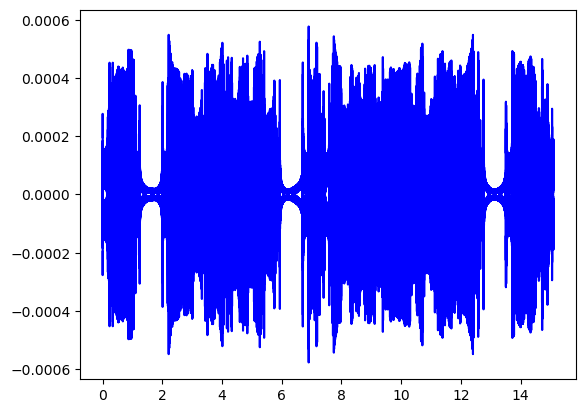

In [11]:
cpl, freq = fft(vecteur_donnees*s.GenerateSinus(1, 6000)(np.array([0+k*Te for k in range(len(vecteur_donnees))])), Te)
f_porteuse = 6000
mask = (-f_porteuse/2 <= freq) & (freq <= f_porteuse/2)
plt.plot(np.array([0+k*Te for k in range(len(vecteur_donnees))]), np.abs(ifft(cpl*mask)),color='blue')

plt.plot(np.array([0+k*Te for k in range(len(vecteur_donnees))]), -np.abs(ifft(cpl*mask)),color='blue')

In [15]:
result = np.correlate(np.abs(cpl), np.abs(cpl), 'full')

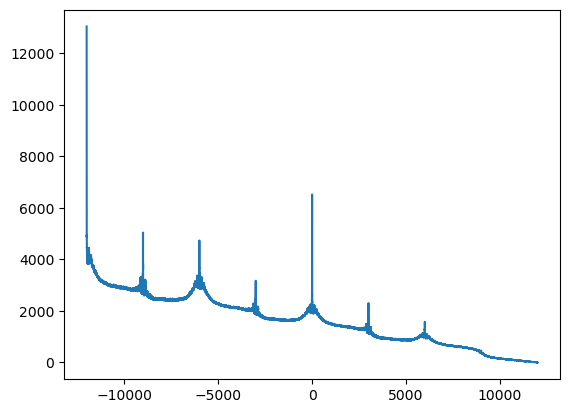

In [29]:
plt.plot(freq, result[len(result)//2:])

In [28]:
len( result[len(result)//2:])==len(freq)

True

In [10]:
idx = np.argmax(np.abs(fft_result[:len(fft_result)//2]))

NameError: name 'fft_result' is not defined